 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Андрей, доброго дня! рад приветствовать тебя) <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы тебе использовать его для своего дальнейшего успеха) И очень здорово будет, если удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br></div>

# Защита персональных данных клиентов

## Описание проекта

### Описание целей и задачи проекта

Нужно защитить данные клиентов страховой компании «Хоть потоп», разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, обосновать корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

### Опсиание данных

Набор данных находится в файле /datasets/insurance.csv.
* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
* Целевой признак: количество страховых выплат клиенту за последние 5 лет.

### План работы

1. Загрузить и изучить данные.
2. Ответить на вопрос и обосновать решение.
* Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
* a. Изменится. Приведите примеры матриц.
* b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import random
from numpy.linalg import inv

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

In [2]:
#считывание данных
try:
    df = pd.read_csv('C:\\Users\\ASUS\\Downloads\\/insurance.csv.')
except FileNotFoundError:
    df = pd.read_csv('/datasets/insurance.csv')
df.head(50)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Тут сам пошаманил)). Но лучше бы сделать некий автомат загрузка для локального компа и для сервера. Например, конструкция try - except..</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>ОК, есть контакт)

In [4]:
df.shape

(5000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Графический анализ

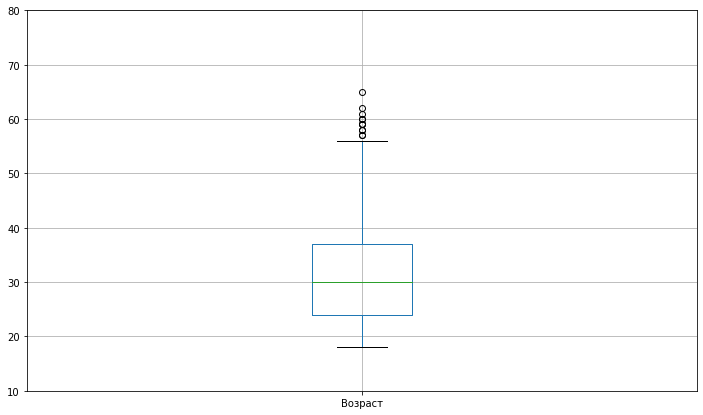

In [7]:
df.boxplot('Возраст', figsize=(12,7))
plt.ylim(10,80);

Основной возраст людей - от 24 до 37 лет

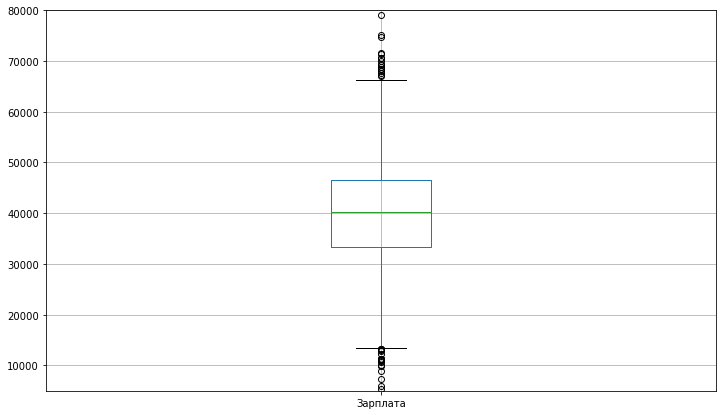

In [8]:
df.boxplot('Зарплата', figsize=(12,7))
plt.ylim(5000,80000);

Основная зарплата людей - от 33 до 46 тыс.

<AxesSubplot:>

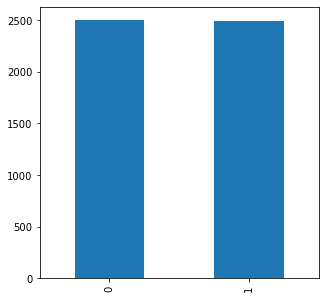

In [9]:
df['Пол'].value_counts().plot.bar(figsize=(5,5))

В данных ровное количество мужчин и женщин

<AxesSubplot:>

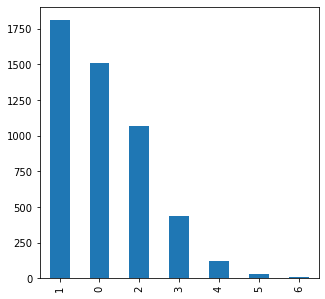

In [10]:
df['Члены семьи'].value_counts().plot.bar(figsize=(5,5))

У людей чаще всего есть один ребенок или нет вообще. Меньше людей, которые имеют 2 и 3 ребенка. Большая редкость иметь больше трех детей.

<AxesSubplot:>

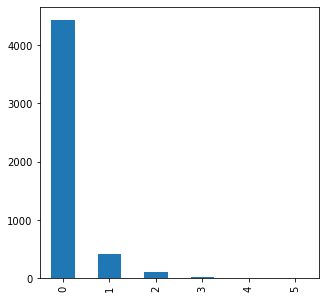

In [11]:
df['Страховые выплаты'].value_counts().plot.bar(figsize=(5,5))

Основная масса людей не имеет страховых выплат.

### Вывод

Не определено какой цифрой обозначен определенный пол человека. Но это не имеет значение. Средний возраст человека в этой таблице - около 31 года. Средняя зарплата - около 40 тысяч. Среднее количество членов семьи у человека - 1. Страховая выплата есть у около 15% людей.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>ОК, описательные статистики что надо. Единственное - можно было разбить исследование для количественных шкал и для номинальных (пол) отдельно.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Но вот по графикам есть такой момент: нужен графический анализ) Если наши данные колличественные, то гистограммы/ящик с усами подходят. А вот если данные категориальные (или бинарные, как пол), то применяется другой тип графика - столбчатый или круговая диаграммы.<br>
Тут можно подисскутировать про "страховые выплаты" и "члены семьи" - они колличественные. Но больше могут походить на категории. Поэтому интереснее и к ним применить столбчатый или круговые диаграммы.<br>
<br>
Скорректируй, пожалуйста.</p>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
С графиками - увидел, ОК. Зафиксирую тогда алгоритм выбора графика, исходя из типа шкалы:

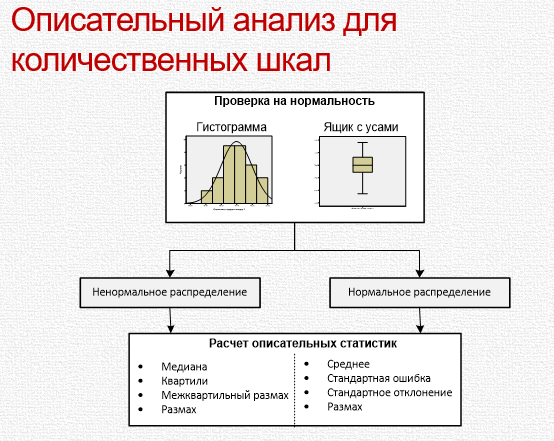

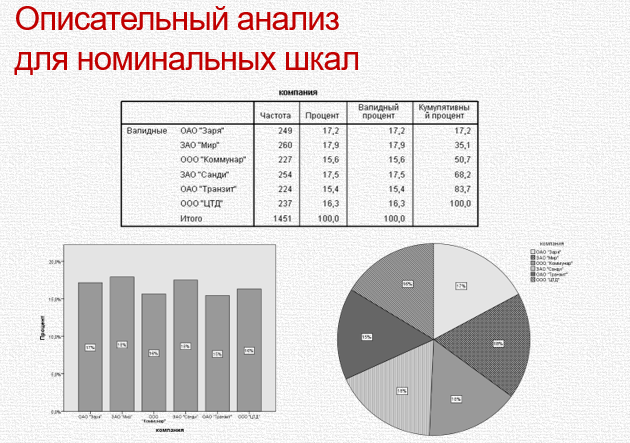

## Изучение взаимосвязи матрицы и линейной регрессиии

Ответить на вопрос и обосновать решение.
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
* a. Изменится. Приведите примеры матриц.
* b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
У матриц есть такие свойста<br>
- ($A(BC) = (AB)C$); это свойство ассоциативности (сочетательности) матриц<br>
- $(P^T)^{-1} = (P^{-1})^T$; то есть: транспортированная оратная матрица есть обратная матрица транспортированная <br>
- $(AB)^T = B^T A^T$; то есть: транспонированное произведение матриц равно произведению транспонированных матриц <br>
- $(AB)^{-1} = B^{-1} A^{-1}$,то есть: обратная матрица от произведения двух матриц равна обратной матрицы B(второй) к обратной матрице А(первой)<br>
- $P P^{-1} = E$ ; умножение матрицы на свою обратную - есть единичная матрица.<br>
- $(ABC)^{-1} =C^{-1} B^{-1} A^{-1}$<br>
    
И вот ожидается алгебраическое доказательсто на их основе.<br>
    
Через выражение (при подстановке $w' = ((XP)^T XP)^{-1} (XP)^T y$) надо дойти до $w' = P^{-1}w$ , где $w = (X^T X)^{-1} X^T y$ Это и будет доказательством. <br>При этом!!!!!!!!!!!! $ (X^T X)^{-1}$ - не надо раскрывать, так как для неквадратных матриц ($X$ и $X^T$) обратных матриц не существует

### Доказательство выражения

$w' = ((XP)^T XP)^{-1} (XP)^T y)  = ((X^T)^{-1} (P^T)^{-1} X^{-1} P^{-1} X^T P^T y) = (P^{-1} (X^T X)^{-1} X^T y) = P^{-1} w$ т.к. $(P^T)^{-1} P^{-1} = E$ и $(X^T)^{-1} X^{-1} = (X^T X)^{-1}$

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
да, примерно так и надо двигаться. Но всё же есть нарушения свойств матриц. Посомтри ещё раз, пожалуйста, на них. И тогда вот начало ниже поможет точнее всё скорректировать)

<div class="alert alert-block alert-info">
<b>Комментарий студента2:</b>
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = ((X^T)^{-1} (P^T)^{-1} X^{-1} P^{-1} X^T P^T y) *
$$
$$
w' = (P^{-1} E (X^T X)^{-1} X^T y) **
$$
$$
w' = (P^{-1} (X^T X)^{-1} X^T y),  w = (X^T X)^{-1} X^T y =>
$$
$$
=>  w' = P^{-1}w
$$

Где * использую  $(P^T)^{-1} P^{-1} = E$ и $(X^T)^{-1} X^{-1} = (X^T X)^{-1}$, а также свойство единичной матрицы $А*Е=А$, где **, от Е просто можно избавиться, как от множителя

Где конкретно наблюдается нарушение свойств матрицы?) Может быть нужно доказательство другой формулы?</div> 

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА 3</b></u></p>Добрый вечер Андрей! <br>Вcё верно, эта формула. Результат - в точку!!! В деталях есть не точность. Вот эти свойства надо ещё раз глянуть:<br>
1) $(AB)^T = B^T A^T$<br>
2) $(ABC)^{-1} =C^{-1} B^{-1} A^{-1}$<br>
3) При этом!!!!!!!!!!!! $ (X^T X)^{-1}$ - не надо раскрывать, так как для неквадратных матриц ($X$ и $X^T$) обратных матриц не существует<br>

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^{-1}(X^T X)^{-1} (P^T)^{-1}  P^TX^T  y) здесь исправил
$$
$$
w' = (P^{-1}  (X^T X)^{-1}E X^T y) 
$$
$$
w' = (P^{-1} (X^T X)^{-1} X^T y),  w = (X^T X)^{-1} X^T y =>
$$
$$
=>  w' = P^{-1}w
$$

<div class="alert alert-block alert-info">
<b>Комментарий студента3:</b> Да, я теперь понял, спасибо!</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 5</b></u></p>
Доброго дня, Андрей.<br>ОК, теперь в точку. Хорошо, что дожал!!!!<br>
    
Ещё несколько идей в целом по теме: если рассматривать передачу данных третьим лицам, то к преимуществам данного подхода можно отнести, в первую очередь, ощутимую экономию ресурсов по сравнению с некоторыми известными алгоритмами шифрования, в особенности это касается ассиметричных алгоритмов с достаточно длинными ключами (AES, RSA), которые требуют много процессорного времени.<br><br>
    
К главному недостатку подхода можно отнести увеличение сложности проверки на вырожденность преобразования с ростом количества признаков в выборке. В рассмотренном случае необходимо подобрать подходящую матрицу размера  4×4 . Однако, если признаки будут исчисляться тысячами, что в теории всегда надо положить, то расчет соответствующих определителей может быть крайне ресурсозатратным. Но и эту проблему можно будет решить)<br><br>
    
Если есть время и желание, то можно воту этот маткриал просмотреть:<br>
Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
Подробнее про аналогичный алгоритм: https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf<br><br>
<font color='green'><font color='green'>
Спасибо за проект) <br>
Успешного дальнейшего обучения

<div class="alert alert-block alert-info">
<b>Комментарий студента2:</b> При доказательстве получаем один и тот же результат => качество линейной регрессии не изменилось.</div>

### Разбиение данных

In [12]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

### Создание класса Линейной регрессии без умножения признаков

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Вывел выше предикт и таргет. Что-то не так с предиктом) Да и с r2 соответственно! Проверь, пожалуйста. </p>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Не нужна была регрессия с умножением признаков, наверное(избавился от него). Сначала задание не понял.</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>ОК, принято.

### Создание класса Линейной регрессии с умножением признаков

In [13]:
class LinearRegression1:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y # < напишите код здесь >
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features @ self.w + self.w0

In [14]:
#обучение модели и значение его качества
model1 = LinearRegression1()
model1.fit(features,target)
predictions1 = model1.predict(features)
print(r2_score(target, predictions1))

0.42494550286668


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Это обычная линейная регрессия.</p>
</div>

### Вывод

При умножении признаков на обратимую матрицу качество линейной регрессии не изменится.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Если мы доказывали преобразование, получается качество модели не поменяется, и мы доказали почему, верно? </div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
Тут, мне кажется , ещё не доказано ничено. Сначала посчитана метрика на полном датасете.. Потом разбили на трайн и тест - и ещё раз посчитали метрику. Т.е. пона просто на исходных данных всё сделали. Преобразований ещё не было)

<div class="alert alert-block alert-info">
<b>Комментарий студента2:</b> При доказательстве мы получаем один и тот же результат - это значит, что качество не поменяется. Но при создании нового класса я не очень понял, как нужно умножить признаки на обратимую матрицу(пробовал создать ее), чтобы получить результат, основанный на доказательстве.</div>

## Алгоритм преобразования данных

Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
А тут больше ожидается план действий для пункта 4) Делай раз, делай два, делай три...Например, так<br>
1) создаём рандомную матрицу<br>
2) проверяем её на обратимость (создаём единичную матрицу)<br>
3) Создаём новую матрицу данных<br>
4) Ищем метрики качества на исходных данных и на преобразованных<br>
5) делаем вывод

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Алгоритм есть, верно?)</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>Да, вот выше и есть алгоритм)

## Программирование алгоритма

#порядковое кодирлвание

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Тут нужна аргументация от тебя по использованию ordinal. Зачем она нам здесь? Тем более и для количественных шакл? Например, была зарплата в рублях, а теперь имеем зарплату в чём?<br>
На мой взгляд - не нужно ни в коем случае тут такое кодирование. Как в принципе оно нужно для категоризации категоризированных данных. Тут на эту роль "пол" подходит. Но он и так тут 0 и 1.

#признаки для порядкого кодирования
features_ordinal = df_ordinal.drop('Страховые выплаты', axis=1)
target_ordinal = df_ordinal['Страховые выплаты']

features_train_ord, features_test_ord, target_train_ord, target_test_ord = train_test_split(features, target, test_size=0.2, random_state=12345)

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>А тут df_ordinal и не используется в итоге))

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Принял, делаю по алгоритму.</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>ок, пошёл смотреть

In [15]:
df.shape[0]

5000

In [16]:
#задание рандомной матрицы
p = np.random.normal(size=(4, 4))

#создание единичной матрицы
ed_matrix = np.eye(4)
ed_matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>Тут такой момент: матрицы р нам достаточно создать 4х4 - по числу факторов!!<br>
    
А далее - верно: проверяем на обратимость и получаем единичную матрицу.

In [17]:
p

array([[-0.09918309, -1.31272164,  0.673279  , -0.4218518 ],
       [ 0.2932863 , -1.16553759,  0.27313464,  2.51992773],
       [ 0.93805676, -1.03803142, -0.07439069, -1.17037753],
       [ 1.15643457,  1.78593187, -0.51105962, -0.26963764]])

In [18]:
#преобразование
p_new = p @ ed_matrix
p_new

array([[-0.09918309, -1.31272164,  0.673279  , -0.4218518 ],
       [ 0.2932863 , -1.16553759,  0.27313464,  2.51992773],
       [ 0.93805676, -1.03803142, -0.07439069, -1.17037753],
       [ 1.15643457,  1.78593187, -0.51105962, -0.26963764]])

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>да, получаем новую матрицу, верно!.<br>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>Но это лучше делать отдельно для фич/факторов. Т.е. целевую можено не преобразовывать!!!

<div class="alert alert-block alert-info">
<b>Комментарий студента2:</b> Вроде исправил.</div>

In [20]:
#проверка качества модели до преобразования
features_new = features @ p
#target_new = p[:,3]

#обучение модели и значение его качества 
model_new = LinearRegression1()
model_new.fit(features_new,target)
predictions_new = model_new.predict(features_new)
print(r2_score(target, predictions_new))

0.42494550286665944


<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
да, единица конечно не может быть. Давай ещё раз пропишу , что в прошлый раз оставлял:<br>    
    
1) матрицу генерим 4х4<br>
2) получаем новую матрицу фич, целевую не изменяем<br>
3) Ну и модель делае, как обычно<br>
В итоге метрика будет должна быть такой же, как и на исходных данных данных!<br>
вот выше показал ещё. Итого будем иметь, что метрика на исходных данных такая же будет, как и на преобразованных. Посомтри, пожалуйста, ещё раз. 

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
Идейно - ОК. Тут вот какие детали:<br>
    
1) матрицу генерим 4х4<br>
2) получаем новую матрицу фич, целевую не изменяем<br>
3) Ну и модель делае, как обычно<br>
В итоге метрика будет должна быть такой же, как и на исходных данных данных!

<div class="alert alert-block alert-info">
<b>Комментарий студента2:</b> Качество модели равно 1? Не верится, что она слишком хороша...</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА 3</b></u></p>
Ты прав - когда метрика 1 - всегда надо проверять! Т.к. вряд ли в реальности есть идеал.<br>
Оставил ещё комментарий по умножению матриц и по расчёту метрик на преобразованных данных. Посмотри, пожалуйста.<br>

<div class="alert alert-block alert-info">
<b>Комментарий студента3:</b> Теперь стало ясно. Удалил свои неверные преобразования, которые давали метрику = 1. Я сам не совсем понял как сделать новую матрицу, только перечитав 2 и 3й комментарии, смог сделать выводы. Оказалось, что для исходных признаков нужна матрица-константа.</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 3</b></u></p>
ОК!!!

### Вывод

После преобразования исходных данных метрика качества модели действительно не поменялась.

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ординал тут не нужно. План действий вот выше написал. Здесь повторю:<br>
1) создаём рандомную матрицу<br>
2) проверяем её на обратимость (создаём единичную матрицу)<br>
3) Создаём новую матрицу данных<br>
4) Ищем метрики качества на исходных данных и на преобразованных<br>
5) делаем вывод<br>
<br>
    
Из вссех пунктов сделан один расчёт: метрика для исходных дынных с помощью линейной регрессии. (в тексте это пометил)<br>
А теперь надо сделать п.1)п.2)п.3)п.4 - для новых данных. Ну и сравнить потом.

## Общий вывод

При умножении признаков на обратимую матрицу качество линейной регрессии не изменится.
После преобразования данных значение качества модели действительно не поменялось и данные пользователей защищены, т.к. качество модели не ухудшилось.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Ок, Андрей, некоторые моменты сделаны на 5 баллов. Но также ещё есть что подкорректировать:К<br>
<br>
1) Загрузка данных.<br>
2) Графический анализ<br>
3) Ординал-категоризация не нужна. Надо делать генерацию новой матрицы (4х4). И далее по плану<br>
4) В разделе "Умножение матриц" ожидается алгебраическое доказательство чуть иначе. В тексте постарался описать проблематику.<font color='red'><br>
Посмотри, пожалуйста)<br><font color='green'><font color='green'>
Спасибо) Буду ждать.

In [27]:
 # генерация матрицы
p = np.random.normal(size=(df.shape[0], df.shape[1]))
p

array([[ 0.56847275, -1.00519047, -0.332507  ,  0.93781182,  0.70805525],
       [-0.21490751,  1.0274255 ,  0.62470559, -1.14292767, -0.30253012],
       [-1.22806148,  0.214375  , -0.01383445, -0.12123272,  0.55279349],
       ...,
       [ 0.22431865,  0.06608574,  0.2088753 , -1.56812433,  0.01573825],
       [ 0.15836715,  0.01092337, -0.37640543, -0.66734791, -0.40028224],
       [ 0.50103741,  0.09333209, -1.10214917,  0.40604548, -0.06673178]])

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
Доброго дня, АНдрей. ОК, движение есть. Но пару моментов всё же осталось<br>
<br>
1) В разделе "Умножение матриц"  - есть ещё что улучшить)<br>
2) И оставил последовательность действий для получения метрики на преобразованных данных - посомтри, пожалуйста<br>
Буду ждать.

<div class="alert alert-block alert-info">
<b>Комментарий студента2:</b> Постарался исправить. Спасибо!</div>